# Assignment 5: Growth and Preferential Attatchment
Submission from Maria Kagkeli, Maria Regina Lily, Mihai Verzan

## Problem 5-3

In [67]:
import networkx as nx
import igraph as ig
import numpy as np
import copy

In [68]:
def barabasi_albert(g, t, m):
    G = copy.deepcopy(g)
    for i in range(t):
        G.add_vertex()
        nodes = [i for i in range(len(G.degree()))]
        new_node = len(nodes)-1
        #print(nodes)
        #print(new_node)
        degs = np.array(G.degree())/np.sum(G.degree())
        targets = np.random.choice(nodes, p=degs, size=m)
        for t in targets:
            G.add_edge(new_node,t) 
            
    G.simplify(multiple="False", loops="False")
    return G    
    '''    
    #for each new node, add m edges to the node
    #choose weighted random target for each new edges
    #weight = degree of existing nodes.
    for n in new_nodes:
        n_i = n.index
        degs = np.array(G.degree())/np.sum(G.degree())
        print(nodes, degs)
        targets = np.random.choice(nodes, p=degs, size=m)
        print(targets)
        for t in targets:
            G.add_edge(n,t) 
    G.simplify(multiple="False", loops="False")
    '''

In [106]:
# create test graph G
G = ig.Graph()
G.add_vertices(4)
G.add_edges([(0,1), (0,2), (1,2), (1,3)])
G_ba = barabasi_albert(G, 100, 2)
ig.plot(G_ba, layout="grid")
degs = G_ab.degree
max_node = G_ba.vs.find(_degree = G_ba.maxdegree())
print(max_node.index)

2


In [144]:
G5 = ig.Graph.Full(5)

In [145]:
G_2 = barabasi_albert(G5, 100, 3)
nodes = len(G_2.vs)
edges = len(G_2.es)
sum_degs = np.sum(G_2.degree())
print(nodes, edges, sum_degs)

105 296 592


In [146]:
G_3 = barabasi_albert(G5, 1000, 4)
cc = G_3.transitivity_avglocal_undirected()
print(cc)

0.03723636167065692


In [147]:
G_3.diameter(directed=False)


5

In [148]:
import collections

#find the degree distribution of original data set
degs_count = collections.Counter(sorted(G_3.degree()))
# remove the first element because it's zero. this throws off the power law fitting function
deg, cnt = zip(*list(degs_count.items())[1:])
cnt = np.array(cnt)/len(G_3.degree())

In [149]:
from scipy.optimize import curve_fit

# this function defines a power law. we use scipy to optimize its parameters
def func(x, e, a):
    return a * x ** e

popt, pcov = curve_fit(func, deg, cnt)
fit_y = [func(i, *popt) for i in deg]

popt

array([-2.53682826, 10.99784289])

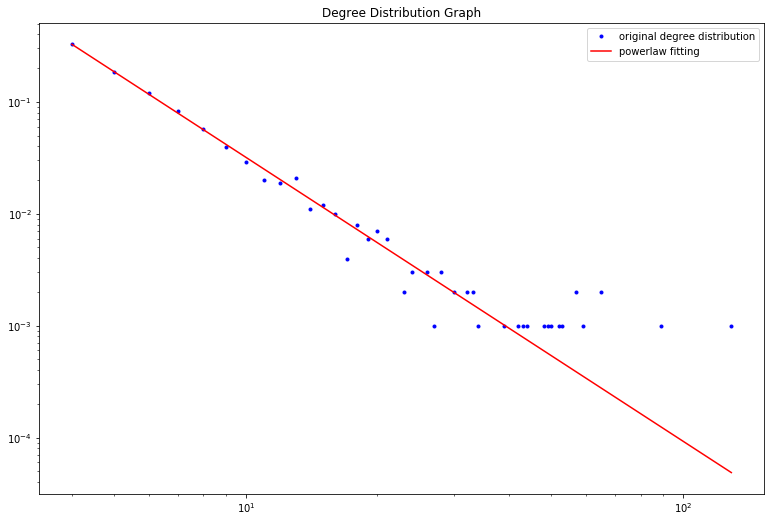

In [150]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_figwidth(13)
fig.set_figheight(13*2/3)
plt.xscale("log")
plt.yscale("log")

plt.plot(deg, cnt, '.', color='b')
plt.plot(deg, fit_y, color='r')

plt.legend(["original degree distribution", "powerlaw fitting"])
plt.title("Degree Distribution Graph")
plt.show()